## Computing the Casimir energy between two spheres

In [1]:
import bempp.api
import math
import numpy as np
from numpy.linalg import slogdet
from bempp.api.assembly.blocked_operator import BlockedOperator
bempp.core.opencl_kernels.set_default_device(0,0)

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
N_wn = 20
lbound = .0008    # lower bound of k in ik
ubound = 10   # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), N_wn)

results_02 = np.empty(N_wn, dtype='float64')
results_015 = np.empty(N_wn, dtype='float64')
results_01 = np.empty(N_wn, dtype='float64')
results_007 = np.empty(N_wn, dtype='float64')

N_Z = 3
surf_dist = [0.5, 1.5, 3]

casimir_energy_02 = np.empty(N_Z, dtype='float64')
casimir_energy_015 = np.empty(N_Z, dtype='float64')
casimir_energy_01 = np.empty(N_Z, dtype='float64')
casimir_energy_007 = np.empty(N_Z, dtype='float64')

In [4]:
def func(x, a, b, c):
    return  a * np.exp(-b * x) + c

In [5]:
h1 = 0.2

for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h1, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h1, origin=(-((point1/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_02[index2] = logdet
        
    xdata = -np.log(quad_points)
    ydata = -results_02
    popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
    extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*lbound)-1) + popt1[2]*lbound
        
    casimir_energy = np.trapz(-results_02 / quad_points, quad_points) / (2 * np.pi)
    print(casimir_energy, casimir_energy + extrapolation1)

0.02969871798848691 0.02979006487633081
0.0008599649471038391 0.0008656723422218249
4.7740656387931184e-05 4.8267591870668514e-05


In [11]:
h2 = 0.15

for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h2, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h2, origin=(-((point1/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_015[index2] = logdet
        
    xdata = -np.log(quad_points)
    ydata = -results_015
    popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
    extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*lbound)-1) + popt1[2]*lbound
        
    casimir_energy = np.trapz(-results_015 / quad_points, quad_points) / (2 * np.pi)
    print(casimir_energy, casimir_energy + extrapolation1)

0.030814697139107713 0.030908081727642547
0.0008739924571285974 0.0008797890300503931
4.8020779241524095e-05 4.8556448360627624e-05


In [12]:
h3 = 0.1

for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h3, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h3, origin=(-((point1/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_01[index2] = logdet
    
    xdata = -np.log(quad_points)
    ydata = -results_01
    popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
    extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*lbound)-1) + popt1[2]*lbound
        
    casimir_energy = np.trapz(-results_01 / quad_points, quad_points) / (2 * np.pi)
    print(casimir_energy, casimir_energy + extrapolation1)    

0.03136650979813624 0.031461118785463815
0.0008826770476095191 0.0008885308319061468
4.837734373986177e-05 4.891414379588829e-05


In [13]:
h4 = 0.07

for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h4, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h4, origin=(-((point1/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_007[index2] = logdet
        
    xdata = -np.log(quad_points)
    ydata = -results_007
    popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
    extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*lbound)-1) + popt1[2]*lbound
        
    casimir_energy = np.trapz(-results_007 / quad_points, quad_points) / (2 * np.pi)
    print(casimir_energy, casimir_energy + extrapolation1)

0.03164283017966536 0.03173806291109195
0.0008871625716856583 0.000893054597962124
4.9183784701380487e-05 4.977075078381659e-05


In [ ]:
h = 0.2 lbound = 10

0.029898383316424543 0.02998972964856685
0.0008594678680767815 0.0008651752374962216
4.7327416936598266e-05 4.785434885994456e-05

lbound = 20

0.02969871798848691 0.02979006487633081
0.0008599649471038391 0.0008656723422218249
4.7740656387931184e-05 4.8267591870668514e-05

#####################################################

h = 0.15

0.030814697139107713 0.030908081727642547
0.0008739924571285974 0.0008797890300503931
4.8020779241524095e-05 4.8556448360627624e-05

####################################################

h = 0.1

0.03136650979813624 0.031461118785463815
0.0008826770476095191 0.0008885308319061468
4.837734373986177e-05 4.891414379588829e-05

####################################################

h = 0.07

0.03164283017966536 0.03173806291109195
0.0008871625716856583 0.000893054597962124
4.9183784701380487e-05 4.977075078381659e-05

In [2]:
Alex_ = [0.0302625, 0.000891542, 0.0000488718]
h_007_no_comp = [0.03164283017966536, 0.0008871625716856583, 4.9183784701380487e-05]
h_007_comp = [0.03173806291109195, 0.000893054597962124, 4.977075078381659e-05]

h_01_no_comp = [0.03136650979813624, 0.0008826770476095191, 4.837734373986177e-05]
h_01_comp = [0.031461118785463815, 0.0008885308319061468, 4.891414379588829e-05]

h_015_no_comp = [0.030814697139107713, 0.0008739924571285974, 4.8020779241524095e-05]
h_015_comp = [0.030908081727642547, 0.0008797890300503931, 4.8556448360627624e-05]

h_02_no_comp = [0.029898383316424543, 0.0008594678680767815, 4.7740656387931184e-05]
h_02_comp = [0.02998972964856685, 0.0008651752374962216, 4.8267591870668514e-05]

In [ ]:
alpha_02_no_ = []
for i in range(len(casimir_energy_02)):
    alpha_02.append(abs(casimir_energy_02[i] - casimir_energy_005[i]))
    
alpha_015 = []
for i in range(len(casimir_energy_02)):
    alpha_015.append(abs(casimir_energy_015[i] - casimir_energy_005[i]))
    
alpha_01 = []
for i in range(len(casimir_energy_02)):
    alpha_01.append(abs(casimir_energy_01[i] - casimir_energy_005[i]))

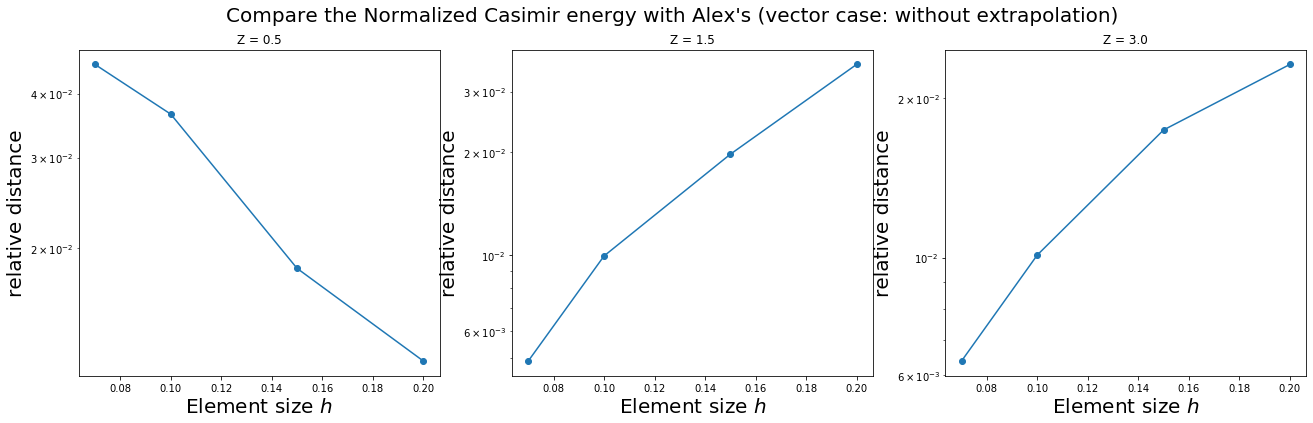

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_no_comp[0]-Alex_[0])/Alex_[0], abs(h_01_no_comp[0]-Alex_[0])/Alex_[0], abs(h_015_no_comp[0]-Alex_[0])/Alex_[0],abs(h_02_no_comp[0]-Alex_[0])/Alex_[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_no_comp[1]-Alex_[1])/Alex_[1], abs(h_01_no_comp[1]-Alex_[1])/Alex_[1], abs(h_015_no_comp[1]-Alex_[1])/Alex_[1],abs(h_02_no_comp[1]-Alex_[1])/Alex_[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_no_comp[2]-Alex_[2])/Alex_[2], abs(h_01_no_comp[2]-Alex_[2])/Alex_[2], abs(h_015_no_comp[2]-Alex_[2])/Alex_[2],abs(h_02_no_comp[2]-Alex_[2])/Alex_[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')

fig.suptitle('Compare the Normalized Casimir energy with Alex\'s (vector case: without extrapolation)', fontsize = 20)
fig.savefig('Vector without extrap CasE.pdf')

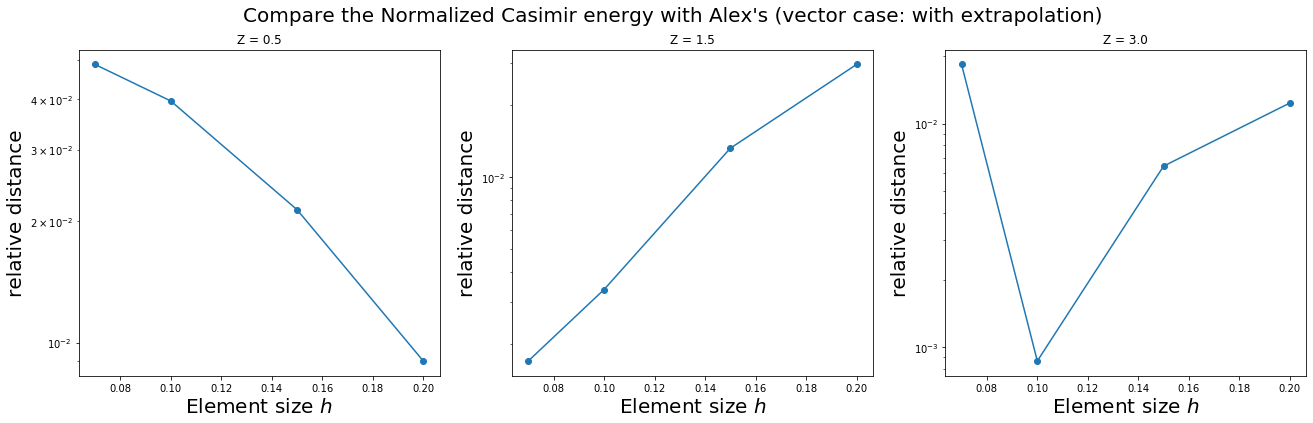

In [10]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_comp[0]-Alex_[0])/Alex_[0], abs(h_01_comp[0]-Alex_[0])/Alex_[0], abs(h_015_comp[0]-Alex_[0])/Alex_[0],abs(h_02_comp[0]-Alex_[0])/Alex_[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_comp[1]-Alex_[1])/Alex_[1], abs(h_01_comp[1]-Alex_[1])/Alex_[1], abs(h_015_comp[1]-Alex_[1])/Alex_[1],abs(h_02_comp[1]-Alex_[1])/Alex_[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_comp[2]-Alex_[2])/Alex_[2], abs(h_01_comp[2]-Alex_[2])/Alex_[2], abs(h_015_comp[2]-Alex_[2])/Alex_[2],abs(h_02_comp[2]-Alex_[2])/Alex_[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')

fig.suptitle('Compare the Normalized Casimir energy with Alex\'s (vector case: with extrapolation)', fontsize = 20)
fig.savefig('Vector with extrap CasE.pdf')

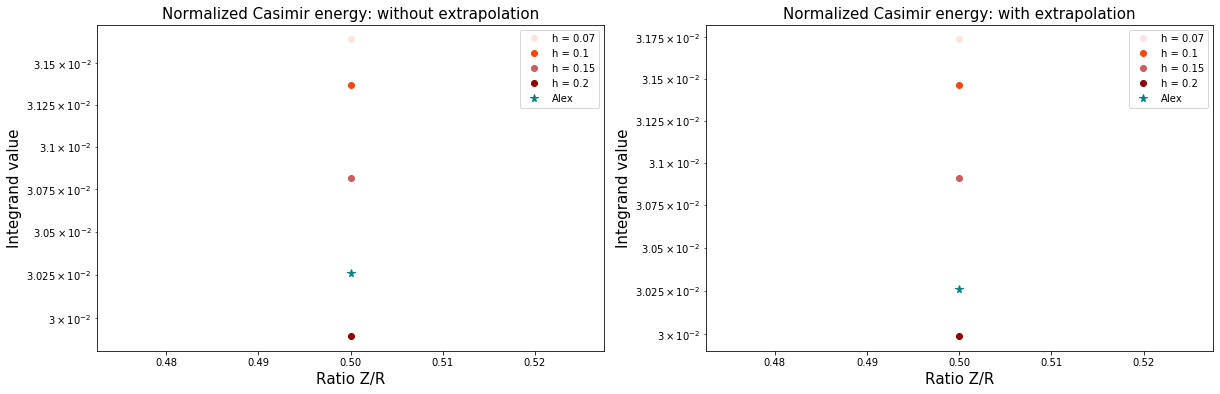

In [42]:
#plt.semilogy([0.07,0.1,0.15,0.2], [h_007_00008[0], h_01_00008[0], h_015_00008[0], h_02_00008[0]],'o')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
#fig.suptitle('Horizontally stacked subplots')

ax1.semilogy([0.5], [h_007_no_comp[0]],'o', color = 'mistyrose')
ax1.semilogy([0.5], [h_01_no_comp[0]], 'o', color = 'orangered')
ax1.semilogy([0.5], [h_015_no_comp[0]],'o', color = 'indianred')
ax1.semilogy([0.5], [h_02_no_comp[0]],'o', color = 'darkred')
ax1.semilogy([0.5], [Alex_[0]],'*', markersize = '8', color = 'teal')
ax1.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax1.set_xlabel('Ratio Z/R', fontsize = 15)
ax1.set_ylabel('Integrand value', fontsize = 15)
ax1.set_title('Normalized Casimir energy: without extrapolation', fontsize = 15)

ax2.semilogy([0.5], [h_007_comp[0]],'o', color = 'mistyrose')
ax2.semilogy([0.5], [h_01_comp[0]], 'o', color = 'orangered')
ax2.semilogy([0.5], [h_015_comp[0]],'o', color = 'indianred')
ax2.semilogy([0.5], [h_02_comp[0]],'o', color = 'darkred')
ax2.semilogy([0.5], [Alex_[0]],'*', markersize = '8', color = 'teal')
ax2.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax2.set_xlabel('Ratio Z/R', fontsize = 15)
ax2.set_ylabel('Integrand value', fontsize = 15)
ax2.set_title('Normalized Casimir energy: with extrapolation', fontsize = 15)
fig.savefig('h-refine CasE 05.pdf')

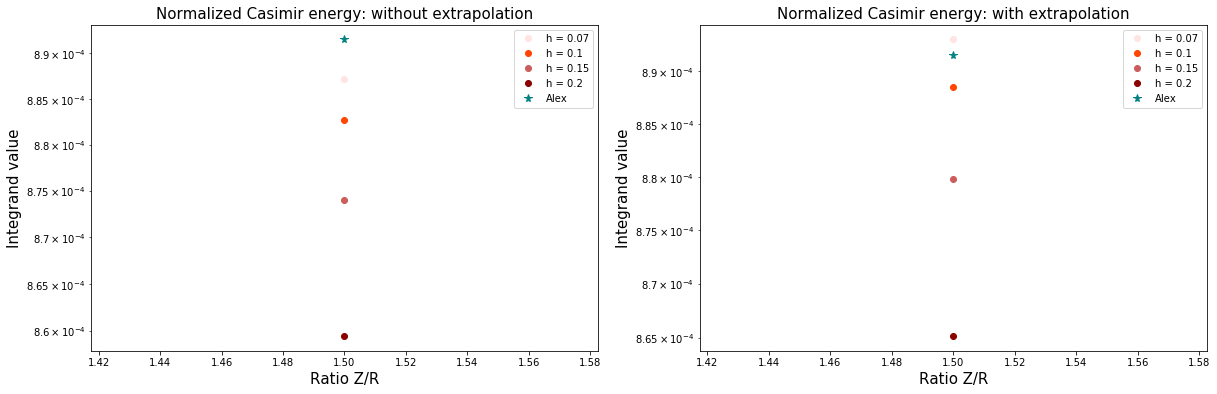

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.semilogy([1.5], [h_007_no_comp[1]],'o', color = 'mistyrose')
ax1.semilogy([1.5], [h_01_no_comp[1]], 'o', color = 'orangered')
ax1.semilogy([1.5], [h_015_no_comp[1]],'o', color = 'indianred')
ax1.semilogy([1.5], [h_02_no_comp[1]],'o', color = 'darkred')
ax1.semilogy([1.5], [Alex_[1]],'*', markersize = '8', color = 'teal')
ax1.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax1.set_xlabel('Ratio Z/R', fontsize = 15)
ax1.set_ylabel('Integrand value', fontsize = 15)
ax1.set_title('Normalized Casimir energy: without extrapolation', fontsize = 15)

ax2.semilogy([1.5], [h_007_comp[1]],'o', color = 'mistyrose')
ax2.semilogy([1.5], [h_01_comp[1]], 'o', color = 'orangered')
ax2.semilogy([1.5], [h_015_comp[1]],'o', color = 'indianred')
ax2.semilogy([1.5], [h_02_comp[1]],'o', color = 'darkred')
ax2.semilogy([1.5], [Alex_[1]],'*', markersize = '8', color = 'teal')
ax2.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax2.set_xlabel('Ratio Z/R', fontsize = 15)
ax2.set_ylabel('Integrand value', fontsize = 15)
ax2.set_title('Normalized Casimir energy: with extrapolation', fontsize = 15)
fig.savefig('h-refine CasE 15.pdf')

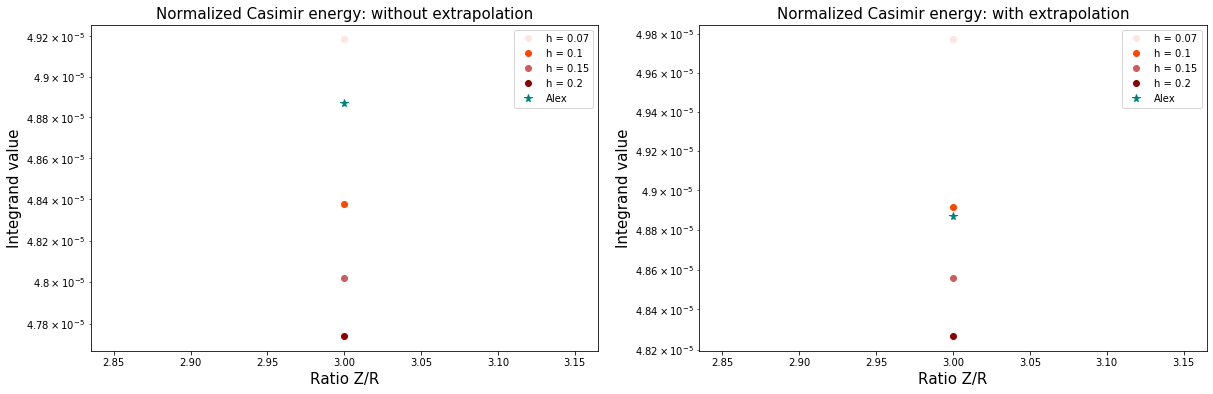

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.semilogy([3], [h_007_no_comp[2]],'o', color = 'mistyrose')
ax1.semilogy([3], [h_01_no_comp[2]], 'o', color = 'orangered')
ax1.semilogy([3], [h_015_no_comp[2]],'o', color = 'indianred')
ax1.semilogy([3], [h_02_no_comp[2]],'o', color = 'darkred')
ax1.semilogy([3], [Alex_[2]],'*', markersize = '8', color = 'teal')
ax1.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax1.set_xlabel('Ratio Z/R', fontsize = 15)
ax1.set_ylabel('Integrand value', fontsize = 15)
ax1.set_title('Normalized Casimir energy: without extrapolation', fontsize = 15)

ax2.semilogy([3], [h_007_comp[2]],'o', color = 'mistyrose')
ax2.semilogy([3], [h_01_comp[2]], 'o', color = 'orangered')
ax2.semilogy([3], [h_015_comp[2]],'o', color = 'indianred')
ax2.semilogy([3], [h_02_comp[2]],'o', color = 'darkred')
ax2.semilogy([3], [Alex_[2]],'*', markersize = '8', color = 'teal')
ax2.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax2.set_xlabel('Ratio Z/R', fontsize = 15)
ax2.set_ylabel('Integrand value', fontsize = 15)
ax2.set_title('Normalized Casimir energy: with extrapolation', fontsize = 15)
fig.savefig('h-refine CasE 3.pdf')

Text(0, 0.5, 'Integrand value')

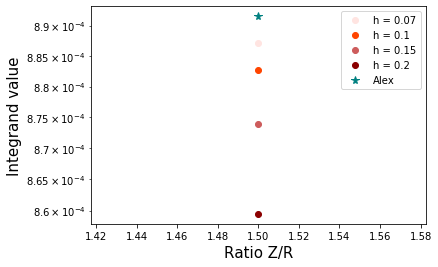

In [17]:
plt.semilogy([1.5], [h_007_no_comp[1]],'o', color = 'mistyrose')
plt.semilogy([1.5], [h_01_no_comp[1]], 'o', color = 'orangered')
plt.semilogy([1.5], [h_015_no_comp[1]],'o', color = 'indianred')
plt.semilogy([1.5], [h_02_no_comp[1]],'o', color = 'darkred')
plt.semilogy([1.5], [Alex_[1]],'*', markersize = '8', color = 'teal')
plt.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
plt.xlabel('Ratio Z/R', fontsize = 15)
plt.ylabel('Integrand value', fontsize = 15)

Text(0, 0.5, 'Integrand value')

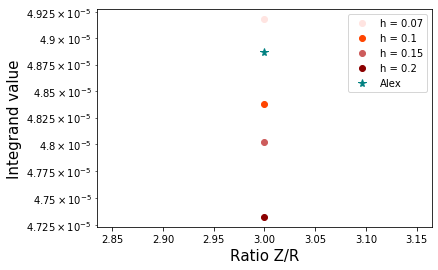

In [18]:
plt.semilogy([3], [h_007_no_comp[2]],'o', color = 'mistyrose')
plt.semilogy([3], [h_01_no_comp[2]], 'o', color = 'orangered')
plt.semilogy([3], [h_015_no_comp[2]],'o', color = 'indianred')
plt.semilogy([3], [h_02_no_comp[2]],'o', color = 'darkred')
plt.semilogy([3], [Alex_[2]],'*', markersize = '8', color = 'teal')
plt.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
plt.xlabel('Ratio Z/R', fontsize = 15)
plt.ylabel('Integrand value', fontsize = 15)

### Fix the distance between the spheres and change the refinement level

In [2]:
h = 0.07  # size of the mesh (element)

In [3]:
point1 = 1.5

center1 = ((point1/2) + 1, 0, 0)
center2 = (-((point1/2) + 1), 0, 0)

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

In [4]:
# Two unit spheres' case 
Nk = 20
lbound = .0008    # lower bound of k in ik
ubound = 10   # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), Nk)

result_k_sphere_sphere = np.empty(Nk, dtype='float64')

In [6]:
for index2, point2 in enumerate(quad_points):

    wavenumber = -1j*np.log(point2)

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    result_k_sphere_sphere[index2] = logdet
    print(wavenumber, logdet)

10j 1.3841150448001758e-12
2.944421460669482j -9.911694333940602e-06
2.251705664919679j -7.207381201179001e-05
1.8463843931121098j -0.00022316050344813238
1.558774246569701j -0.00048558798700393756
1.335673853284447j -0.0008681290137164355
1.1533810695446172j -0.0013663393811261324
0.9992509424057592j -0.0019634325444524963
0.8657349645747501j -0.0026319704101379154
0.7479639183664902j -0.003336604855722249
0.6426129943706615j -0.004037921547511971
0.5473106623582197j -0.004697174027256811
0.4603058252422055j -0.005281365950535566
0.38026865134128873j -0.005767819186174304
0.30616542244561407j -0.006147135430363178
0.2371766618005024j -0.0064234921121888
0.17264173766340357j -0.006611620633319819
0.11202028968165964j -0.0067307524207826375
0.05486469703655952j -0.006797213382422341
0.0008000000000000095j -0.006942818902510305


In [6]:
result_k_sphere_sphere = np.array([1.3841150448001758e-12, -9.911694333940602e-06, -7.207381201179001e-05, -0.00022316050344813238, -0.00048558798700393756,
                          -0.0008681290137164355,  -0.0013663393811261324, -0.0019634325444524963, -0.0026319704101379154,  -0.003336604855722249,
                          -0.004037921547511971,  -0.004697174027256811, -0.005281365950535566, -0.005767819186174304,  -0.006147135430363178,
                          -0.0064234921121888, -0.006611620633319819, -0.0067307524207826375, -0.006797213382422341, -0.006942818902510305])

Casimir_energy_sphere_sphere = np.trapz(-result_k_sphere_sphere / quad_points, quad_points) / (2 * np.pi)
print(Casimir_energy_sphere_sphere)

0.0008871625716856583


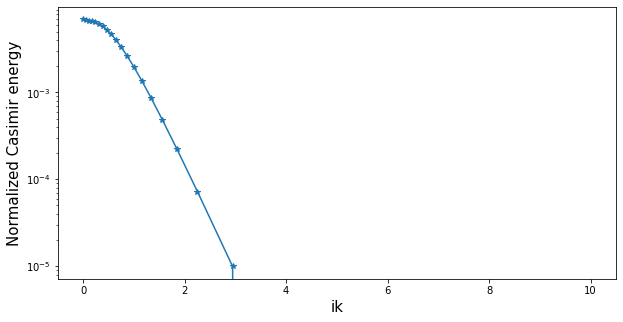

In [7]:
plt.figure(figsize=[10,5])
plt.semilogy(-np.log(quad_points), -result_k_sphere_sphere, '*-')
#plt.semilogy(-np.log(quad_points), np.exp(2*point1*np.log(quad_points)), '*-')
plt.xlabel('ik', fontsize = 15)
plt.ylabel('Normalized Casimir energy', fontsize = 15)
plt.savefig('compensation in vector case.pdf')

In [8]:
def func(x, a, b, c):
    return  a * np.exp(-b * x) + c

In [9]:
xdata = -np.log(quad_points)
ydata = -result_k_sphere_sphere

In [10]:
from scipy.optimize import curve_fit
popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
#popt1, pcov1 = curve_fit(func, xdata, ydata,maxfev=5000)

print(popt1)

[ 1.23743561e+01  4.12413754e-04 -1.23669890e+01]


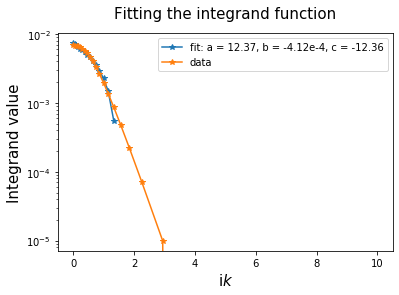

In [19]:
plt.semilogy(xdata[-15:], func(xdata[-15:], *popt1), '*-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1)) 
plt.semilogy(xdata, -result_k_sphere_sphere, '*-')

plt.legend(['fit: a = 12.37, b = -4.12e-4, c = -12.36','data'])
plt.xlabel('$\mathrm{i}k$', fontsize = 15)
plt.ylabel('Integrand value', fontsize = 15)
plt.title('Fitting the integrand function', pad = 15, fontsize = 15)
plt.savefig('Fitting curve with 15 points.pdf')

In [25]:
extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*0.0005)-1) + popt1[2]*0.0005
print(extrapolation1)

3.669495396826114e-07


In [26]:
Casimir_energy_sphere_sphere + extrapolation1

4.9550734241063096e-05

In [ ]:
# h = 0.05 lbound = 0.0005 ubound = 10 Nk = 15

4.857114710432565e-12
-2.400639180515978e-05
-0.00017003992166509562
-0.0005107550597803416
-0.0010717483127983098
-0.0018340367037418838
-0.002739198171662087
-0.003700164974862442
-0.00461864506555168
-0.0054073214035449315
-0.006011358910793823
-0.006420813441205136
-0.006665825632538724
-0.006792749113503897
-0.0031304614696740776

In [ ]:
# h = 0.05 lbound = 0.05 ubound = 4 Nk = 15     0.0008347816215735227
# h = 0.05 lbound = 0.005 ubound = 10 Nk = 15   0.0008839440880102482 + 0.006791591024078004 * 0.005/(2*np.pi) = 0.000889348664424951
# h= 0.05 lbound = 0.0005 ubound = 10 Nk = 15   0.0008676267145901311 + 0.006844663855577464 * 0.0005/(2*np.pi) = 0.0008681713956333399

In [ ]:
0.006853769425774483 k = 0.005
0.006844663855577464 k = 0.0005
0.026719433639992886 k = 0.00005
2.0152150720391 k = 0.000005

0.0005j 0.004962869115152277
5e-05j 288.43982883765057
0.005j 0.006853769425774483

In [ ]:
0.006791591024078004 * 0.005/(2*np.pi) + 0.0008839440880102482

In [ ]:
 0.0008676267145901311 + 0.0031304614696740776 * 0.0005/(2*np.pi)

### Asymptotic formula 

In [ ]:
coeff_list  = [143/16, 0, 7947/160, 2065/32, 27705347/100800, 
               -55251/64, 1373212550401/144506880, -7583389/320, -2516749144274023/44508119040, 274953589659739/275251200 ]

In [ ]:
center_dist = np.linspace(2 + lower_bd, 2 + upper_bd, NZ)

asy_casimir_energy_sphere_sphere = np.empty(NZ, dtype='float64')

for i in range(NZ):
    asy_casimir_energy = 0
    for j in range(len(coeff_list)):
        asy_casimir_energy += (1/center_dist[i]**7) * coeff_list[j] * (1/center_dist[i]**j)
    asy_casimir_energy_sphere_sphere[i] = asy_casimir_energy/np.pi

In [ ]:
asy_casimir_energy_sphere_sphere

In [ ]:
Casimir_energy_sphere_sphere

In [ ]:
asy_casimir_energy_sphere_sphere = [1.27307776e-01, 3.04388845e-02, 8.88097446e-03, 3.12744966e-03,
       1.30285246e-03, 6.23568804e-04, 3.32259784e-04, 1.91799465e-04,
       1.17511850e-04, 7.53229883e-05, 5.00150569e-05, 3.41701231e-05,
       2.39043771e-05, 1.70635980e-05, 1.23958639e-05]

Casimir_energy_sphere_sphere_02 = [2.82217173e-02, 8.71642132e-03, 3.45274474e-03, 1.58781287e-03,8.07319501e-04, 4.42179209e-04, 2.56455693e-04, 1.55743461e-04,
                                   9.81924304e-05, 6.39025190e-05, 4.27275802e-05, 2.92526588e-05,2.04465415e-05, 1.45526805e-05, 1.05296755e-05] 
Casimir_energy_sphere_sphere_01 = [2.94853971e-02, 9.02908591e-03, 3.56088959e-03, 1.63278728e-03, 8.29084949e-04, 4.53560750e-04, 2.62821709e-04, 1.59468781e-04,
                                   1.00490939e-04, 6.53723438e-05, 4.36987549e-05, 2.99088562e-05, 2.08986651e-05, 1.48731473e-05, 1.07598028e-05]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

ref_x = [0.5,1,1.5,2,2.5,3,3.5]
ref_y = [0.03953125, 0.0038125, 0.000775 , 0.0003953125, 0.0001, 0.000055,0.0000325]
plt.semilogy(surf_dist, Casimir_energy_sphere_sphere_02, color = 'salmon', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, asy_casimir_energy_sphere_sphere, color = 'darkred', linestyle = '-', marker = 'o')
plt.scatter(ref_x, ref_y, s=100, facecolors='none', edgecolors='g')

plt.ylabel('Normalized Casimir Energy h=0.2')
plt.legend(['Bempp (h = 0.05)','Asymptotic series', 'Johnson'])
plt.xlabel('The ratio Z/R')
#plt.savefig('compare_bempp_asym02.pdf')

In [ ]:
ref_x = [0.5,1,1.5,2,2.5,3,3.5]
ref_y = [0.03953125, 0.0038125, 0.000775 , 0.0003953125, 0.0001, 0.000055,0.0000325]
plt.semilogy(surf_dist, Casimir_energy_sphere_sphere_01, color = 'salmon', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, asy_casimir_energy_sphere_sphere, color = 'darkred', linestyle = '-', marker = 'o')
plt.scatter(ref_x, ref_y, s=100, facecolors='none', edgecolors='g')

plt.ylabel('Normalized Casimir Energy h=0.1')
plt.legend(['Bempp (h = 0.1)','Asymptotic series', 'Johnson'])
plt.xlabel('The ratio Z/R')
plt.savefig('compare_bempp_asym01.pdf')

In [ ]:
relative_error_01 = []
for i in range(len(Casimir_energy_sphere_sphere_01)):
    relative_error_01.append(abs(Casimir_energy_sphere_sphere_01[i] - asy_casimir_energy_sphere_sphere[i])/asy_casimir_energy_sphere_sphere[i])

In [ ]:
test_integrand = []
for index2, point2 in enumerate(np.linspace(0.5, 15, 30)):
    wavenumber = point2*1j

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    test_integrand.append(-logdet)

In [ ]:
plt.plot(np.linspace(0.5,15,30),test_integrand)

In [ ]:
test_integrand

In [ ]:
def integrand_value(wavenumber):
    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    return -logdet

In [ ]:
integrand_value(0.0005*1j)

In [ ]:
10j 4.857114710432565e-12
2.197361262259909j -8.43026709799603e-05
1.50441843018822j -0.0005621828143542206
1.0990214475234847j -0.0015604592666624408
0.811373439533901j -0.0029513528190753344
0.5882503274540094j -0.004423056059498058
0.40594239704836066j -0.005630636448645465
0.25180145046928865j -0.006384246080236555
0.1182773578430768j -0.006734315448267652
0.0004999999999999795j -0.0031304614696740776

In [6]:
sphere1_05 = bempp.api.shapes.sphere(h=0.1, origin=((0.5/2) + 1, 0, 0))
sphere2_05 = bempp.api.shapes.sphere(h=0.1, origin=(-((0.5/2) + 1), 0, 0))
two_spheres_05 = bempp.api.grid.grid.union([sphere1_05, sphere2_05])

sphere1_15 = bempp.api.shapes.sphere(h=0.1, origin=((1.5/2) + 1, 0, 0))
sphere2_15 = bempp.api.shapes.sphere(h=0.1, origin=(-((1.5/2) + 1), 0, 0))
two_spheres_15 = bempp.api.grid.grid.union([sphere1_15, sphere2_15])

sphere1_3 = bempp.api.shapes.sphere(h=0.1, origin=((3/2) + 1, 0, 0))
sphere2_3 = bempp.api.shapes.sphere(h=0.1, origin=(-((3/2) + 1), 0, 0))
two_spheres_3 = bempp.api.grid.grid.union([sphere1_3, sphere2_3])

In [7]:
bempp.api.export('two_spheres_05.msh', grid = two_spheres_05)
bempp.api.export('two_spheres_15.msh', grid = two_spheres_15)
bempp.api.export('two_spheres_3.msh', grid = two_spheres_3)